# ASSIGNMENT - Big Data and Data Mining
## Student ID - 202102828

---
Libraries for analysis and prediction
---

In [ ]:
!pip install geopandas

     |████████████████████████████████| 1.0 MB 5.1 MB/s 
     |████████████████████████████████| 6.3 MB 52.0 MB/s 
     |████████████████████████████████| 16.7 MB 45.4 MB/s 


In [ ]:
!pip install geojson_rewind

In [ ]:
# libraries
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from numpy import mean, std

# Apriori
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori

# association pattern mining
from mlxtend.frequent_patterns import association_rules

# sklearn
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split, cross_val_score, RepeatedStratifiedKFold
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.ensemble import StackingClassifier

# significance
from scipy.stats import shapiro

# geopandas and plotly
import geopandas
import plotly.express as px
from geojson_rewind import rewind
# url
from urllib.request import urlopen

# json
import json

---
Read in the csv file
---

In [ ]:
# read in the accident file

df_accidents = pd.read_csv('/content/drive/MyDrive/Big Data/Road Safety Data - Accidents 2019.csv', dtype={'variable_ID': int})
df_accidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117536 entries, 0 to 117535
Data columns (total 32 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   Accident_Index                               117536 non-null  object 
 1   Location_Easting_OSGR                        117508 non-null  float64
 2   Location_Northing_OSGR                       117508 non-null  float64
 3   Longitude                                    117508 non-null  float64
 4   Latitude                                     117508 non-null  float64
 5   Police_Force                                 117536 non-null  int64  
 6   Accident_Severity                            117536 non-null  int64  
 7   Number_of_Vehicles                           117536 non-null  int64  
 8   Number_of_Casualties                         117536 non-null  int64  
 9   Date                                         117536 non-nul

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (0,31) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
# read in the casualties file

df_casualties = pd.read_csv('/content/drive/MyDrive/Big Data/Road Safety Data - Casualties 2019.csv', dtype={'variable_ID': int})
df_casualties.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153158 entries, 0 to 153157
Data columns (total 16 columns):
 #   Column                              Non-Null Count   Dtype 
---  ------                              --------------   ----- 
 0   Accident_Index                      153158 non-null  object
 1   Vehicle_Reference                   153158 non-null  int64 
 2   Casualty_Reference                  153158 non-null  int64 
 3   Casualty_Class                      153158 non-null  int64 
 4   Sex_of_Casualty                     153158 non-null  int64 
 5   Age_of_Casualty                     153158 non-null  int64 
 6   Age_Band_of_Casualty                153158 non-null  int64 
 7   Casualty_Severity                   153158 non-null  int64 
 8   Pedestrian_Location                 153158 non-null  int64 
 9   Pedestrian_Movement                 153158 non-null  int64 
 10  Car_Passenger                       153158 non-null  int64 
 11  Bus_or_Coach_Passenger              153

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
# read in the vehicles file

df_vehicles = pd.read_csv('/content/drive/MyDrive/Big Data/Road Safety Data- Vehicles 2019.csv', dtype={'variable_ID': int})
df_vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216381 entries, 0 to 216380
Data columns (total 23 columns):
 #   Column                            Non-Null Count   Dtype 
---  ------                            --------------   ----- 
 0   Accident_Index                    216381 non-null  object
 1   Vehicle_Reference                 216381 non-null  int64 
 2   Vehicle_Type                      216381 non-null  int64 
 3   Towing_and_Articulation           216381 non-null  int64 
 4   Vehicle_Manoeuvre                 216381 non-null  int64 
 5   Vehicle_Location-Restricted_Lane  216381 non-null  int64 
 6   Junction_Location                 216381 non-null  int64 
 7   Skidding_and_Overturning          216381 non-null  int64 
 8   Hit_Object_in_Carriageway         216381 non-null  int64 
 9   Vehicle_Leaving_Carriageway       216381 non-null  int64 
 10  Hit_Object_off_Carriageway        216381 non-null  int64 
 11  1st_Point_of_Impact               216381 non-null  int64 
 12  Wa

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
# read in the govt probabiliy file
df_cas_prob = pd.read_csv('/content/drive/MyDrive/Big Data/cas_adjustment_lookup_2019.csv')
df_cas_prob.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3314737 entries, 0 to 3314736
Data columns (total 6 columns):
 #   Column              Dtype  
---  ------              -----  
 0   accident_index      object 
 1   Vehicle_Reference   int64  
 2   Casualty_Reference  int64  
 3   Adjusted_Serious    float64
 4   Adjusted_Slight     float64
 5   Injury_Based        int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 151.7+ MB


In [ ]:
# create copies of the original dfs

df_acc_cpy = df_accidents.copy()
df_cas_cpy = df_casualties.copy()
df_veh_cpy = df_vehicles.copy()

---
Data Pre-processing
---

In [ ]:
# check if there are nan or missing cells in the file
df_acc_cpy.isna().sum()

Accident_Index                                    0
Location_Easting_OSGR                            28
Location_Northing_OSGR                           28
Longitude                                        28
Latitude                                         28
Police_Force                                      0
Accident_Severity                                 0
Number_of_Vehicles                                0
Number_of_Casualties                              0
Date                                              0
Day_of_Week                                       0
Time                                             63
Local_Authority_(District)                        0
Local_Authority_(Highway)                         0
1st_Road_Class                                    0
1st_Road_Number                                   0
Road_Type                                         0
Speed_limit                                       0
Junction_Detail                                   0
Junction_Con

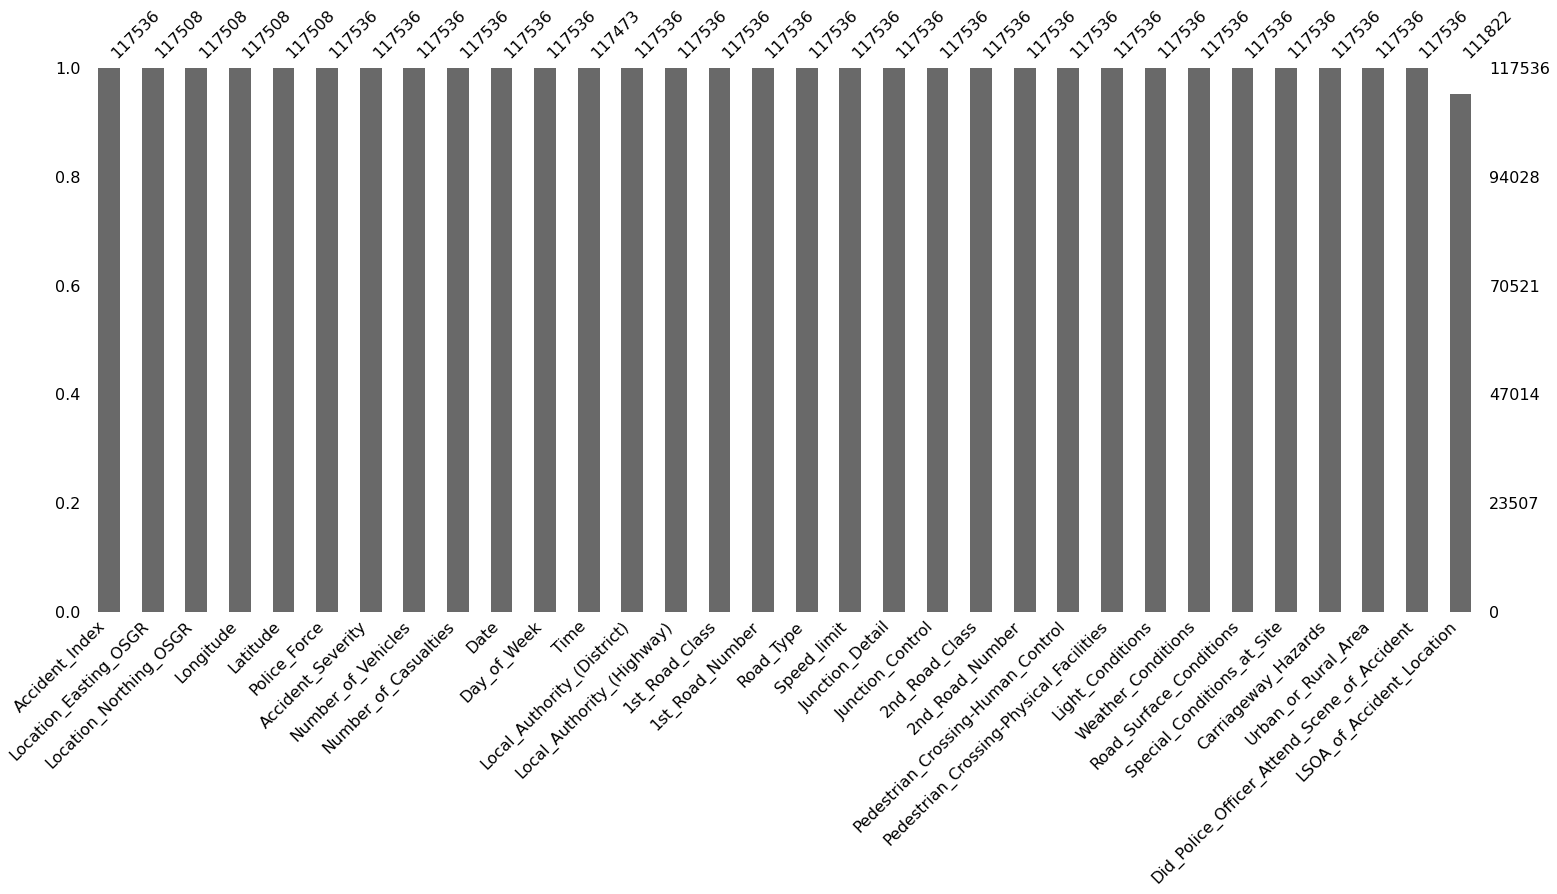

In [ ]:
# plot for detecting empty cells
msno.bar(df_acc_cpy)

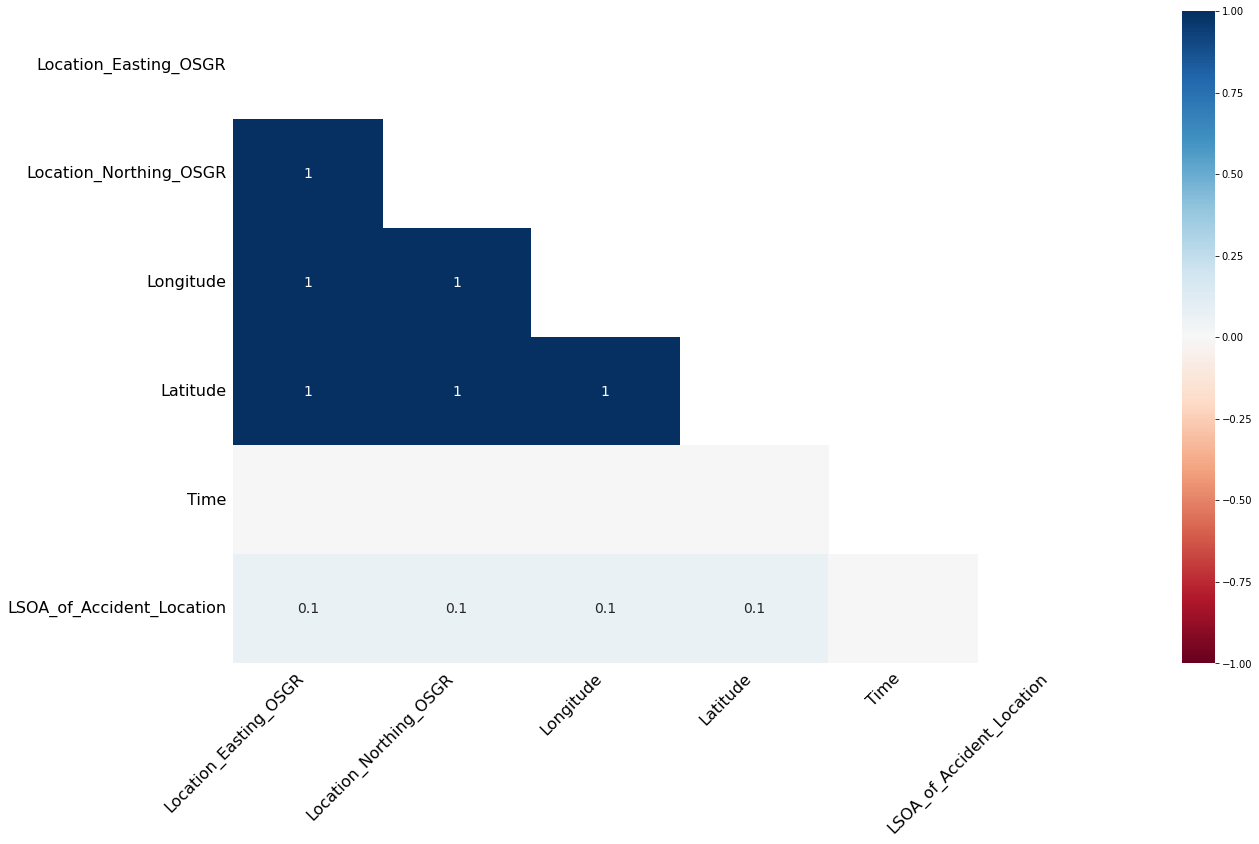

In [ ]:
msno.heatmap(df_acc_cpy)

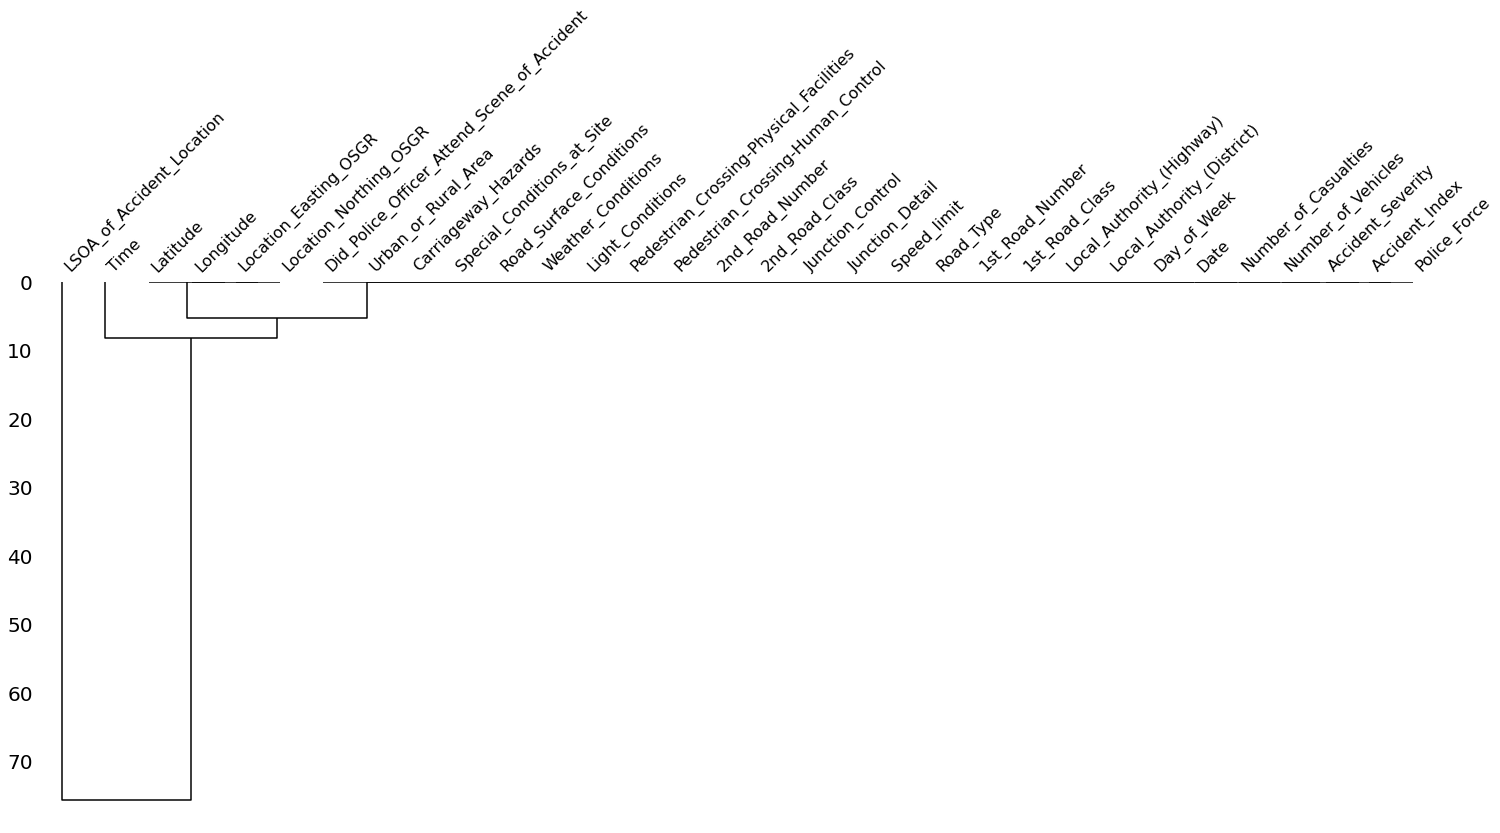

In [ ]:
msno.dendrogram(df_acc_cpy)

In [ ]:
# replace the nan values with new category 'Unknown'
df_acc_cpy['LSOA_of_Accident_Location'].replace(['', ' ', np.nan], ['Unknown', 'Unknown', 'Unknown'], inplace=True)

# drop the rows with nan values as they have little to no effect on the analysis
df_acc_cpy.dropna(inplace=True)

In [ ]:
df_acc_cpy.isnull().sum()

Accident_Index                                 0
Location_Easting_OSGR                          0
Location_Northing_OSGR                         0
Longitude                                      0
Latitude                                       0
Police_Force                                   0
Accident_Severity                              0
Number_of_Vehicles                             0
Number_of_Casualties                           0
Date                                           0
Day_of_Week                                    0
Time                                           0
Local_Authority_(District)                     0
Local_Authority_(Highway)                      0
1st_Road_Class                                 0
1st_Road_Number                                0
Road_Type                                      0
Speed_limit                                    0
Junction_Detail                                0
Junction_Control                               0
2nd_Road_Class      

In [ ]:
df_acc_cpy['Time'] = pd.DatetimeIndex(df_acc_cpy['Time'])
df_acc_cpy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117445 entries, 0 to 117535
Data columns (total 32 columns):
 #   Column                                       Non-Null Count   Dtype         
---  ------                                       --------------   -----         
 0   Accident_Index                               117445 non-null  object        
 1   Location_Easting_OSGR                        117445 non-null  float64       
 2   Location_Northing_OSGR                       117445 non-null  float64       
 3   Longitude                                    117445 non-null  float64       
 4   Latitude                                     117445 non-null  float64       
 5   Police_Force                                 117445 non-null  int64         
 6   Accident_Severity                            117445 non-null  int64         
 7   Number_of_Vehicles                           117445 non-null  int64         
 8   Number_of_Casualties                         117445 non-null  in

In [ ]:
# workshop 1 
# convert the time decimal time
def convert_time(df):
  hours = pd.DatetimeIndex(df['Time']).hour
  mins = pd.DatetimeIndex(df['Time']).minute/60
  return hours + mins

In [ ]:
df_acc_cpy['Decimal Time'] = convert_time(df_acc_cpy)
df_acc_cpy['Decimal Time']

0         17.833333
1         21.750000
2          1.833333
3          1.333333
4          0.666667
            ...    
117531     1.000000
117532     8.766667
117533    15.500000
117534    14.166667
117535    12.750000
Name: Decimal Time, Length: 117445, dtype: float64

In [ ]:
# convert date col type to datetime object
df_acc_cpy['Date'] = pd.to_datetime(df_acc_cpy['Date'])

---
Detailed Analysis
---

**Are there significant hours of the day, and days of the week, on which accidents occur?**

In [ ]:
# function for custom palette based on the column for setting hue
def palette(df, column):
  unique = df[column].unique()
  palette = dict(zip(unique, sns.color_palette(n_colors=len(unique))))
  return palette

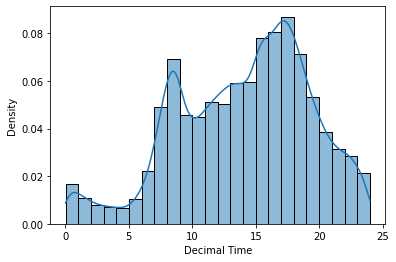

In [ ]:
# accidents by hour of the day
#plt.figure(figsize=(12, 8))
acc_hour_plot = sns.histplot(data = df_acc_cpy, x = 'Decimal Time', kde = True, stat = 'density', bins=24)

In [ ]:
# find the standard deviation
std = round(df_acc_cpy['Decimal Time'].std(), 2)
std

5.2

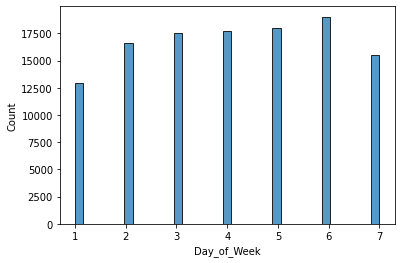

In [ ]:
# accidents by day of week
acc_dow_plot = sns.histplot(data = df_acc_cpy, x = df_acc_cpy.Day_of_Week)

In [ ]:
# Add Day of Year column to the accidents df
day_of_year = []
for date in df_acc_cpy.Date:
    period = pd.Period(date, freq='D')
    day_of_year.append(period.dayofyear)
df_acc_cpy['Day of Year'] = day_of_year

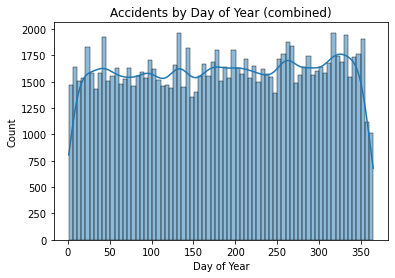

In [ ]:
# accidents by day of year
acc_doy_plot = sns.histplot(data = df_acc_cpy, x = df_acc_cpy['Day of Year'], bins=73, kde=True)
plt.title('Accidents by Day of Year (combined)')
plt.show()

In [ ]:
# geopandas
gdf = geopandas.GeoDataFrame(df_acc_cpy, geometry=geopandas.points_from_xy(df_acc_cpy.Longitude, df_acc_cpy.Latitude))
gdf.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Decimal Time,Day of Year,geometry
0,2019010128300,528218.0,180407.0,-0.153842,51.508057,1,3,2,3,2019-02-18,...,1,1,0,0,1,3,E01004762,17.833333,49,POINT (-0.15384 51.50806)
1,2019010152270,530219.0,172463.0,-0.127949,51.436208,1,3,2,1,2019-01-15,...,1,1,0,0,1,3,E01003117,21.750000,15,POINT (-0.12795 51.43621)
2,2019010155191,530222.0,182543.0,-0.124193,51.526795,1,3,2,1,2019-01-01,...,1,1,0,0,1,1,E01000943,1.833333,1,POINT (-0.12419 51.52679)
3,2019010155192,525531.0,184605.0,-0.191044,51.546387,1,2,1,1,2019-01-01,...,1,1,0,0,1,1,E01000973,1.333333,1,POINT (-0.19104 51.54639)
4,2019010155194,524920.0,184004.0,-0.200064,51.541121,1,3,2,2,2019-01-01,...,1,1,0,0,1,1,E01000546,0.666667,1,POINT (-0.20006 51.54112)


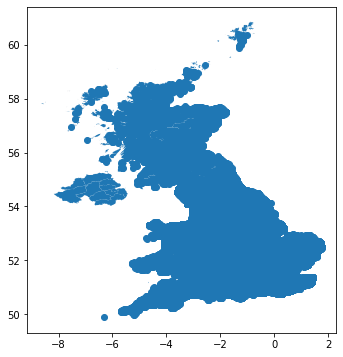

In [ ]:
world = geopandas.read_file('/content/drive/MyDrive/Big Data/Counties_and_Unitary_Authorities_(December_2021)_UK_BFC.geojson')

#axis = world.plot(
#    color='lightblue', edgecolor='black'
#)
axis = world.plot()
gdf.plot(ax = axis)

fig = plt.gcf()
fig.set_size_inches(9, 6)
plt.show()

**For motorbikes, are there significant hours of the day, and days of the week, on which accidents occur?**

In [ ]:
# merge the accidents and vehicles file by accident index

df_acc_veh_merge = pd.merge(df_acc_cpy, df_veh_cpy, on=['Accident_Index'], how='inner')

In [ ]:
df_acc_veh_merge

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type,Vehicle_IMD_Decile
0,2019010128300,528218.0,180407.0,-0.153842,51.508057,1,3,2,3,2019-02-18,...,6,1,58,9,-1,-1,-1,2,1,2
1,2019010128300,528218.0,180407.0,-0.153842,51.508057,1,3,2,3,2019-02-18,...,6,3,-1,-1,-1,-1,-1,2,1,2
2,2019010152270,530219.0,172463.0,-0.127949,51.436208,1,3,2,1,2019-01-15,...,6,2,24,5,-1,-1,-1,3,1,3
3,2019010152270,530219.0,172463.0,-0.127949,51.436208,1,3,2,1,2019-01-15,...,6,3,-1,-1,-1,-1,-1,6,1,6
4,2019010155191,530222.0,182543.0,-0.124193,51.526795,1,3,2,1,2019-01-01,...,6,1,45,7,-1,-1,-1,4,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175502,2019984107019,337522.0,591682.0,-2.983499,55.215407,98,3,4,1,2019-05-30,...,1,1,20,4,2198,2,4,5,3,5
175503,2019984107219,318544.0,567087.0,-3.274645,54.991685,98,3,2,1,2019-06-21,...,6,1,33,6,1997,2,12,3,2,3
175504,2019984107219,318544.0,567087.0,-3.274645,54.991685,98,3,2,1,2019-06-21,...,6,1,61,9,2967,2,5,7,3,7
175505,2019984107419,336525.0,584226.0,-2.997491,55.148292,98,3,1,1,2019-06-29,...,5,1,78,11,1597,2,6,8,3,8


In [ ]:
# accidents by motorbikes

df_motorbikes = df_acc_veh_merge[(df_acc_veh_merge['Vehicle_Type'] >= 2) & (df_acc_veh_merge['Vehicle_Type'] < 6) | (df_acc_veh_merge['Vehicle_Type'] == 97)]
df_motorbikes

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type,Vehicle_IMD_Decile
30,2019010155225,512750.0,180199.0,-0.376691,51.509481,1,3,2,1,2019-01-01,...,6,1,30,6,-1,-1,-1,4,1,4
39,2019010155254,534122.0,189977.0,-0.065175,51.592686,1,3,2,1,2019-01-01,...,1,1,19,4,-1,-1,-1,2,1,2
41,2019010155255,531638.0,180380.0,-0.104600,51.507028,1,3,1,1,2019-01-01,...,6,1,54,8,-1,-1,-1,5,1,5
46,2019010155263,538972.0,171167.0,-0.002610,51.422484,1,2,2,1,2019-01-01,...,6,1,20,4,-1,-1,-1,4,1,4
49,2019010155276,519377.0,184736.0,-0.279706,51.548898,1,2,2,1,2019-01-01,...,6,1,65,9,-1,-1,-1,-1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175433,2019983112919,298215.0,576153.0,-3.595481,55.069377,98,2,1,1,2019-05-16,...,6,1,38,7,124,1,3,3,1,3
175484,2019984105619,313386.0,566995.0,-3.355209,54.989987,98,3,3,1,2019-07-05,...,5,1,21,5,124,1,5,7,2,7
175487,2019984105819,311026.0,580728.0,-3.396366,55.112939,98,1,3,1,2019-04-05,...,6,1,49,8,999,1,32,6,3,6
175490,2019984106019,341523.0,579842.0,-2.918177,55.109520,98,2,1,1,2019-12-05,...,6,1,65,9,1170,1,13,10,1,10


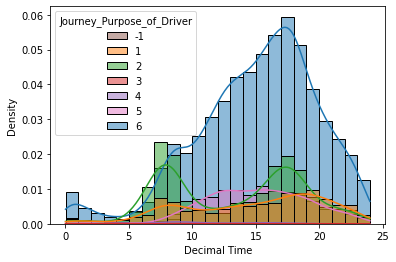

In [ ]:
# accidents by hour of the day for the motorbikes
acc_hour_motorbikes_plot = sns.histplot(data = df_motorbikes, x = 'Decimal Time', kde = True, stat = 'density', bins=24, hue=df_motorbikes['Journey_Purpose_of_Driver'], palette=palette(df_motorbikes, 'Journey_Purpose_of_Driver'))

In [ ]:
df_motorbikes['Vehicle_Type'].value_counts()

3     6646
5     4249
4     1773
2     1226
97     357
Name: Vehicle_Type, dtype: int64

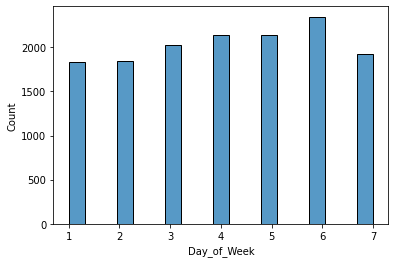

In [ ]:
# accidents by day of week for motorbikes
acc_dow_motorbikes_plot = sns.histplot(data = df_motorbikes, x = df_motorbikes.Day_of_Week)

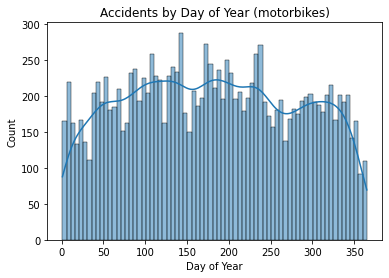

In [ ]:
# accidents by day of year for motorbikes
acc_doy_motorbikes_plot = sns.histplot(data = df_motorbikes, x = df_motorbikes['Day of Year'], bins=73, kde=True)
plt.title('Accidents by Day of Year (motorbikes)')
plt.show()

In [ ]:
round(df_motorbikes['Decimal Time'].std(), 2)

4.91

**For pedestrians involved in accidents, are there significant hours of the day, and days of the week, on which they are more likely to be involved?**

In [ ]:
# merrge the accidents and casualties df

df_acc_cas_merge = pd.merge(df_acc_cpy, df_cas_cpy, on='Accident_Index', how='inner')
df_acc_cas_merge

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type,Casualty_IMD_Decile
0,2019010128300,528218.0,180407.0,-0.153842,51.508057,1,3,2,3,2019-02-18,...,9,3,0,0,0,0,0,9,1,2
1,2019010128300,528218.0,180407.0,-0.153842,51.508057,1,3,2,3,2019-02-18,...,-1,3,0,0,1,0,0,9,1,5
2,2019010128300,528218.0,180407.0,-0.153842,51.508057,1,3,2,3,2019-02-18,...,-1,3,0,0,2,0,0,9,1,5
3,2019010152270,530219.0,172463.0,-0.127949,51.436208,1,3,2,1,2019-01-15,...,5,3,0,0,0,0,0,9,1,3
4,2019010155191,530222.0,182543.0,-0.124193,51.526795,1,3,2,1,2019-01-01,...,5,3,0,0,0,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128485,2019984106919,312635.0,573392.0,-3.368899,55.047323,98,3,1,1,2019-05-18,...,5,3,0,0,0,0,0,19,3,6
128486,2019984107019,337522.0,591682.0,-2.983499,55.215407,98,3,4,1,2019-05-30,...,5,3,0,0,0,0,0,19,1,1
128487,2019984107219,318544.0,567087.0,-3.274645,54.991685,98,3,2,1,2019-06-21,...,9,3,0,0,0,0,0,9,3,7
128488,2019984107419,336525.0,584226.0,-2.997491,55.148292,98,3,1,1,2019-06-29,...,8,3,5,3,0,0,0,0,3,8


In [ ]:
# get the pedestrians from the merged files

df_pedestrians = df_acc_cas_merge[df_acc_cas_merge['Casualty_Class'] == 3]
df_pedestrians

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type,Casualty_IMD_Decile
5,2019010155192,525531.0,184605.0,-0.191044,51.546387,1,2,1,1,2019-01-01,...,10,2,5,4,0,0,0,0,1,4
11,2019010155196,532424.0,164886.0,-0.099071,51.367605,1,3,1,1,2019-01-01,...,7,3,1,3,0,0,0,0,1,4
19,2019010155209,543649.0,186237.0,0.070738,51.556734,1,3,1,1,2019-01-01,...,5,3,1,1,0,0,0,0,1,8
20,2019010155210,537356.0,183448.0,-0.021065,51.533238,1,1,1,1,2019-01-01,...,5,1,5,1,0,0,0,0,1,10
21,2019010155216,532724.0,185103.0,-0.087182,51.549218,1,3,1,1,2019-01-01,...,7,3,5,3,0,0,0,0,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128440,2019983114119,297464.0,576134.0,-3.607229,55.069052,98,2,1,1,2019-01-06,...,9,2,5,1,0,0,0,0,1,4
128445,2019983115619,296071.0,577414.0,-3.629501,55.080260,98,3,1,1,2019-06-19,...,1,3,9,8,0,0,0,0,-1,-1
128463,2019984104219,313523.0,582066.0,-3.357641,55.125401,98,2,1,1,2019-05-04,...,10,2,6,9,0,0,0,0,2,4
128464,2019984104419,331608.0,566975.0,-3.070480,54.992647,98,3,1,1,2019-09-04,...,4,3,6,9,0,0,0,0,2,6


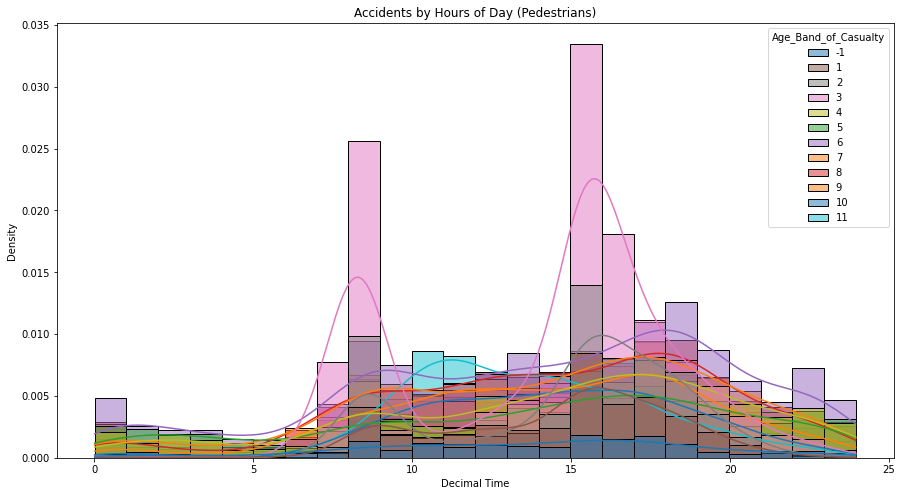

In [ ]:
# accidents by hour of the day for the pedestrians

plt.figure(figsize=(15, 8))
acc_hour_pedestrians_plot = sns.histplot(data = df_pedestrians, x = 'Decimal Time', kde = True, stat = 'density', bins=24, hue=df_pedestrians['Age_Band_of_Casualty'], palette=palette(df_pedestrians, 'Age_Band_of_Casualty'))
plt.title('Accidents by Hours of Day (Pedestrians)')
plt.show()

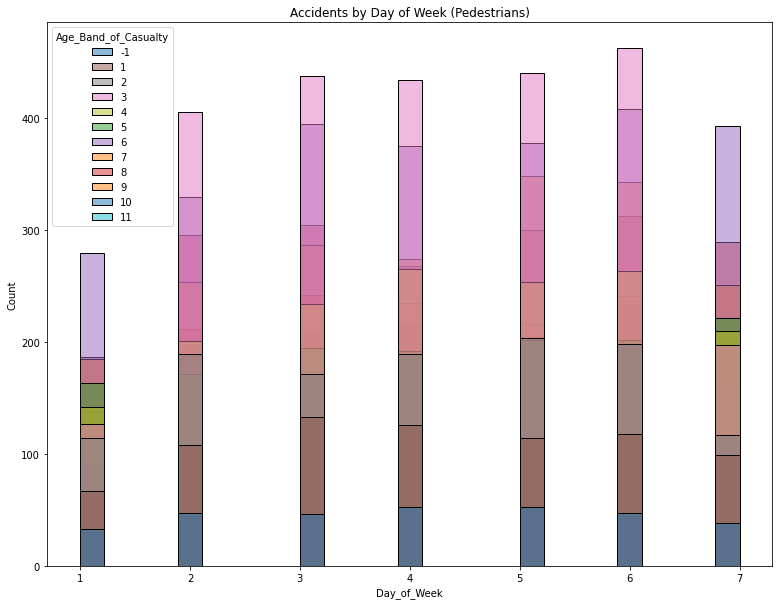

In [ ]:
# accidents by day of week for pedestrians
plt.figure(figsize=(13, 10))
acc_dow_pedestrians_plot = sns.histplot(data = df_pedestrians, x = df_pedestrians.Day_of_Week, hue=df_pedestrians['Age_Band_of_Casualty'], palette=palette(df_pedestrians, 'Age_Band_of_Casualty'))
plt.title('Accidents by Day of Week (Pedestrians)')
plt.show()

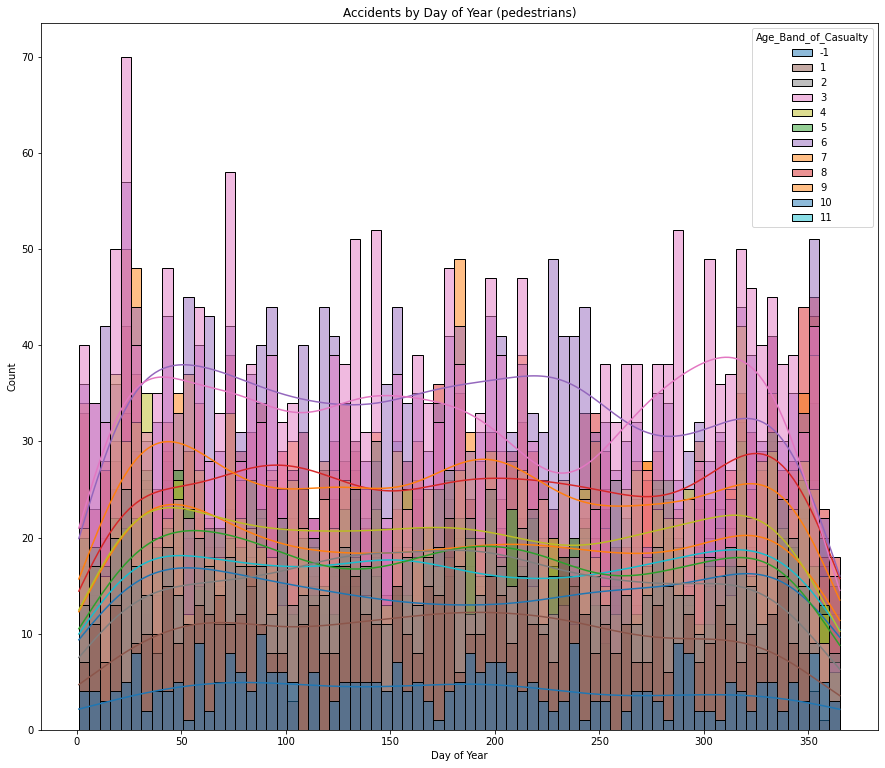

In [ ]:
# accidents by day of year for pedestrians
plt.figure(figsize=(15, 13))
acc_doy_pedestrians_plot = sns.histplot(data = df_pedestrians, x = df_pedestrians['Day of Year'], bins=73, kde=True, hue=df_pedestrians['Age_Band_of_Casualty'], palette=palette(df_pedestrians, 'Age_Band_of_Casualty'))
plt.title('Accidents by Day of Year (pedestrians)')
plt.show()

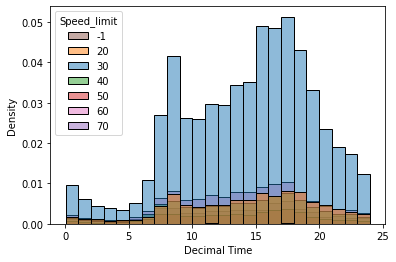

In [ ]:
# plot showing accidents by speed limit

sns.histplot(data = df_acc_cpy, x = 'Decimal Time', stat = 'density', bins=24, hue='Speed_limit', palette=palette(df_acc_cpy, 'Speed_limit'))

**What impact, if any, does daylight savings have on road traffic accidents in the week after it starts and stops?**

check for impact after daylight savings started

In [ ]:
# week after daylight savings
start_week_after = df_acc_cpy[(df_acc_cpy['Date'] >= '2019-04-07') & (df_acc_cpy['Date'] < '2019-04-15')]
start_week_after

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Decimal Time,Day of Year,geometry
6414,2019010174884,546367.0,185655.0,0.109674,51.550806,1,3,2,1,2019-04-13,...,1,1,0,0,1,1,E01000023,0.033333,103,POINT (0.10967 51.55081)
6420,2019010174894,530211.0,182912.0,-0.124215,51.530113,1,2,1,1,2019-04-13,...,1,1,0,0,1,1,E01000956,0.833333,103,POINT (-0.12422 51.53011)
6421,2019010174895,533876.0,191518.0,-0.068136,51.606593,1,2,3,2,2019-04-13,...,1,1,0,0,1,1,E01002034,0.500000,103,POINT (-0.06814 51.60659)
6422,2019010174901,541310.0,189906.0,0.038496,51.590292,1,3,2,1,2019-04-13,...,1,1,0,0,2,1,E01003764,7.500000,103,POINT (0.03850 51.59029)
6423,2019010174912,546613.0,167753.0,0.105798,51.389885,1,3,2,1,2019-04-13,...,1,1,0,0,1,1,E01000722,10.416667,103,POINT (0.10580 51.38988)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116844,201997NA00704,275164.0,665278.0,-3.996286,55.864458,97,3,3,2,2019-04-13,...,1,1,0,0,1,1,Unknown,16.500000,103,POINT (-3.99629 55.86446)
116851,201997NA01004,272179.0,665374.0,-4.043994,55.864537,97,3,1,1,2019-04-14,...,1,1,0,0,2,2,Unknown,17.916667,104,POINT (-4.04399 55.86454)
117100,201997QC00504,280784.0,653987.0,-3.901590,55.764489,97,3,3,1,2019-04-14,...,1,1,0,0,1,1,Unknown,18.250000,104,POINT (-3.90159 55.76449)
117342,2019980854385,292207.0,581154.0,-3.691416,55.113028,98,3,2,2,2019-04-07,...,1,1,0,0,2,1,Unknown,14.166667,97,POINT (-3.69142 55.11303)


In [ ]:
# week of daylight savings

start_first_week = df_acc_cpy[(df_acc_cpy['Date'] >= '2019-04-01') & (df_acc_cpy['Date'] < '2019-04-07')]
start_first_week

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Decimal Time,Day of Year,geometry
107,2019010155652,528607.0,180095.0,-0.148353,51.505164,1,3,2,1,2019-04-01,...,1,1,-1,-1,1,3,E01004761,0.250000,91,POINT (-0.14835 51.50516)
109,2019010155655,532482.0,173504.0,-0.095022,51.445039,1,3,3,3,2019-04-01,...,1,1,0,0,1,1,E01003170,1.500000,91,POINT (-0.09502 51.44504)
111,2019010155657,531697.0,168006.0,-0.108352,51.395813,1,3,2,1,2019-04-01,...,1,1,0,0,1,1,E01001002,0.416667,91,POINT (-0.10835 51.39581)
113,2019010155668,537338.0,182819.0,-0.021569,51.527590,1,3,2,1,2019-04-01,...,1,1,-1,0,1,3,E01004267,7.083333,91,POINT (-0.02157 51.52759)
115,2019010155696,523006.0,184869.0,-0.227347,51.549315,1,3,1,1,2019-04-01,...,1,1,0,0,1,1,E01000639,9.850000,91,POINT (-0.22735 51.54931)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117435,2019981105519,206693.0,560704.0,-5.016568,54.903557,98,3,1,1,2019-04-05,...,1,1,0,0,1,1,Unknown,12.833333,95,POINT (-5.01657 54.90356)
117505,2019984100119,320024.0,566481.0,-3.251351,54.986481,98,3,2,1,2019-04-01,...,1,1,0,0,1,1,Unknown,18.583333,91,POINT (-3.25135 54.98648)
117511,2019984101719,330759.0,568838.0,-3.084198,55.009267,98,3,2,1,2019-04-02,...,1,2,0,0,2,1,Unknown,20.250000,92,POINT (-3.08420 55.00927)
117525,2019984105819,311026.0,580728.0,-3.396366,55.112939,98,1,3,1,2019-04-05,...,1,1,0,0,2,1,Unknown,10.916667,95,POINT (-3.39637 55.11294)


In [ ]:
# week before daylight savings

start_week_before = df_acc_cpy[(df_acc_cpy['Date'] >= '2019-03-24') & (df_acc_cpy['Date'] < '2019-04-01')]
start_week_before

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Decimal Time,Day of Year,geometry
3415,2019010165755,512965.0,185521.0,-0.371889,51.557272,1,3,2,1,2019-03-28,...,1,1,0,0,1,1,E01002223,9.050000,87,POINT (-0.37189 51.55727)
5067,2019010170857,542611.0,185849.0,0.055618,51.553510,1,3,2,1,2019-03-24,...,1,1,0,0,1,1,E01003578,1.000000,83,POINT (0.05562 51.55351)
5071,2019010170863,532073.0,187483.0,-0.095673,51.570759,1,3,2,3,2019-03-24,...,1,1,0,0,1,1,E01033701,3.516667,83,POINT (-0.09567 51.57076)
5074,2019010170869,534782.0,182705.0,-0.058436,51.527181,1,3,1,1,2019-03-24,...,1,1,0,0,1,1,E01004203,6.016667,83,POINT (-0.05844 51.52718)
5075,2019010170870,518156.0,165382.0,-0.303768,51.375207,1,3,1,1,2019-03-24,...,1,1,0,0,1,1,E01003002,6.833333,83,POINT (-0.30377 51.37521)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117210,201997UA70403,236587.0,637945.0,-4.595713,55.607590,97,3,2,2,2019-03-24,...,1,1,0,0,2,1,Unknown,17.500000,83,POINT (-4.59571 55.60759)
117300,201997UD01303,235268.0,620481.0,-4.606234,55.450392,97,3,2,1,2019-03-25,...,1,1,0,0,1,2,Unknown,19.166667,84,POINT (-4.60623 55.45039)
117432,2019981103419,205648.0,560807.0,-5.032910,54.904076,98,3,1,1,2019-03-25,...,9,1,0,0,1,2,Unknown,22.000000,84,POINT (-5.03291 54.90408)
117433,2019981103519,209828.0,558600.0,-4.966356,54.885879,98,2,1,3,2019-03-27,...,1,1,0,0,2,1,Unknown,20.500000,86,POINT (-4.96636 54.88588)


In [ ]:
date_range = [len(start_week_after), len(start_first_week), len(start_week_before)]
date_range

[2704, 1881, 2557]

In [ ]:
daylight_savings = pd.DataFrame({'Count of Accidents': date_range}, index=['start_week_after', 'start_first_week', 'start_week_before'])
daylight_savings

,Count of Accidents
start_week_after,2704
start_first_week,1881
start_week_before,2557


check impact of daylight savings after it stopped

In [ ]:
#first week daylight savings stopped

stop_first_week = df_acc_cpy[(df_acc_cpy['Date'] >= '2019-10-27') & (df_acc_cpy['Date'] < '2019-11-03')]
stop_first_week

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Decimal Time,Day of Year,geometry
453,2019010156860,530685.0,178054.0,-0.119185,51.486346,1,3,1,1,2019-11-01,...,2,2,0,0,1,1,E01003102,4.000000,305,POINT (-0.11918 51.48635)
455,2019010156869,533975.0,168520.0,-0.075434,51.399898,1,3,2,1,2019-11-01,...,1,1,0,0,1,1,E01001136,8.250000,305,POINT (-0.07543 51.39990)
456,2019010156875,533758.0,184429.0,-0.072534,51.542917,1,3,2,1,2019-11-01,...,1,2,0,0,1,1,E01033698,8.416667,305,POINT (-0.07253 51.54292)
457,2019010156882,527062.0,173799.0,-0.172864,51.448931,1,3,3,1,2019-11-01,...,1,1,0,0,1,1,E01004622,7.633333,305,POINT (-0.17286 51.44893)
460,2019010156890,545602.0,188672.0,0.099897,51.578112,1,3,2,1,2019-11-01,...,1,2,1,0,1,1,E01003751,8.966667,305,POINT (0.09990 51.57811)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117277,201997UD00202,241747.0,619664.0,-4.503440,55.445195,97,3,3,1,2019-11-02,...,1,2,0,0,2,1,Unknown,20.666667,306,POINT (-4.50344 55.44519)
117401,2019980895659,308548.0,569700.0,-3.431659,55.013421,98,2,1,1,2019-10-29,...,1,1,0,0,2,1,Unknown,16.583333,302,POINT (-3.43166 55.01342)
117444,2019982101819,281619.0,561313.0,-3.849088,54.932413,98,3,1,1,2019-11-02,...,1,1,0,0,2,1,Unknown,20.500000,306,POINT (-3.84909 54.93241)
117457,2019983100519,300624.0,578594.0,-3.558624,55.091792,98,2,2,1,2019-11-01,...,1,2,0,0,2,1,Unknown,11.916667,305,POINT (-3.55862 55.09179)


In [ ]:
# week after daylight savings stopped

stop_week_after = df_acc_cpy[(df_acc_cpy['Date'] >= '2019-11-03') & (df_acc_cpy['Date'] < '2019-11-11')]
stop_week_after

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Decimal Time,Day of Year,geometry
4228,2019010168258,529003.0,163400.0,-0.148725,51.355036,1,3,2,2,2019-11-03,...,4,1,0,0,1,1,E01004177,0.216667,307,POINT (-0.14872 51.35504)
4229,2019010168260,544011.0,177916.0,0.072559,51.481872,1,3,2,2,2019-11-03,...,1,1,0,0,1,1,E01001700,2.433333,307,POINT (0.07256 51.48187)
4230,2019010168261,536711.0,163245.0,-0.038155,51.351843,1,3,1,3,2019-11-03,...,4,1,0,0,1,1,E01001065,4.250000,307,POINT (-0.03816 51.35184)
4231,2019010168262,520883.0,192853.0,-0.255204,51.621528,1,3,2,1,2019-11-03,...,4,1,0,0,1,1,E01000231,6.166667,307,POINT (-0.25520 51.62153)
4232,2019010168269,552485.0,188453.0,0.199058,51.574328,1,3,2,1,2019-11-03,...,1,1,0,0,1,1,E01002352,8.000000,307,POINT (0.19906 51.57433)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117258,201997UC70205,251681.0,626778.0,-4.350343,55.512174,97,2,2,1,2019-11-05,...,1,1,0,0,2,1,Unknown,16.500000,309,POINT (-4.35034 55.51217)
117326,201997UD70503,232271.0,631389.0,-4.660162,55.547278,97,3,2,1,2019-11-03,...,1,1,0,0,1,1,Unknown,12.250000,307,POINT (-4.66016 55.54728)
117327,201997UD70505,235182.0,626102.0,-4.610929,55.500816,97,2,1,1,2019-11-05,...,1,1,0,0,1,1,Unknown,15.650000,309,POINT (-4.61093 55.50082)
117353,2019980860335,287691.0,558981.0,-3.753464,54.912871,98,3,3,1,2019-11-07,...,1,1,0,0,2,2,Unknown,17.333333,311,POINT (-3.75346 54.91287)


In [ ]:
# week before daylight savings stopped

stop_week_before = df_acc_cpy[(df_acc_cpy['Date'] >= '2019-10-20') & (df_acc_cpy['Date'] < '2019-10-27')]
stop_week_before

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Decimal Time,Day of Year,geometry
13336,2019010195204,523223.0,187463.0,-0.223310,51.572581,1,3,2,1,2019-10-20,...,1,1,0,0,1,1,E01000221,21.916667,293,POINT (-0.22331 51.57258)
19618,2019010212864,539367.0,188450.0,0.009890,51.577693,1,3,2,1,2019-10-20,...,1,1,0,0,2,1,E01004366,22.883333,293,POINT (0.00989 51.57769)
19620,2019010212870,531656.0,177271.0,-0.105500,51.479084,1,3,2,1,2019-10-20,...,1,1,0,0,1,1,E01003183,0.283333,293,POINT (-0.10550 51.47908)
19623,2019010212875,524922.0,182092.0,-0.200713,51.523938,1,3,2,1,2019-10-20,...,1,1,0,0,1,1,E01004675,1.233333,293,POINT (-0.20071 51.52394)
19624,2019010212879,526477.0,181014.0,-0.178697,51.513904,1,3,2,2,2019-10-20,...,1,1,0,0,1,1,E01004697,3.750000,293,POINT (-0.17870 51.51390)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117395,2019980891945,283592.0,561765.0,-3.818497,54.936937,98,2,2,1,2019-10-25,...,4,2,0,0,1,1,Unknown,19.700000,298,POINT (-3.81850 54.93694)
117397,2019980892058,299867.0,577077.0,-3.569947,55.078013,98,3,4,1,2019-10-26,...,1,1,0,2,2,1,Unknown,12.000000,299,POINT (-3.56995 55.07801)
117399,2019980893978,289250.0,574684.0,-3.735230,55.054263,98,1,3,3,2019-10-25,...,2,2,0,0,2,2,Unknown,15.666667,298,POINT (-3.73523 55.05426)
117402,2019980895716,332390.0,567782.0,-3.058451,55.000004,98,2,2,2,2019-10-25,...,1,1,0,3,2,1,Unknown,7.000000,298,POINT (-3.05845 55.00000)


In [ ]:
date_range = [len(stop_week_after), len(stop_first_week), len(stop_week_before)]
date_range

[2590, 2232, 2155]

In [ ]:
daylight_savings = pd.DataFrame({'Count of Accidents': date_range}, index=['stop_week_after', 'stop_first_week', 'stop_week_before'])
daylight_savings

,Count of Accidents
stop_week_after,2590
stop_first_week,2232
stop_week_before,2155


**Are there particular types of vehicles (engine capacity, age of vehicle, etc.) that are more frequently involved in road traffic accidents?**

In [ ]:
df_veh_cpy

,Accident_Index,Vehicle_Reference,Vehicle_Type,Towing_and_Articulation,Vehicle_Manoeuvre,Vehicle_Location-Restricted_Lane,Junction_Location,Skidding_and_Overturning,Hit_Object_in_Carriageway,Vehicle_Leaving_Carriageway,...,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type,Vehicle_IMD_Decile
0,2019010128300,1,9,0,-1,-1,-1,-1,-1,-1,...,6,1,58,9,-1,-1,-1,2,1,2
1,2019010128300,2,9,0,-1,-1,-1,-1,-1,-1,...,6,3,-1,-1,-1,-1,-1,2,1,2
2,2019010152270,1,9,0,18,-1,0,-1,-1,-1,...,6,2,24,5,-1,-1,-1,3,1,3
3,2019010152270,2,9,0,18,-1,0,-1,-1,-1,...,6,3,-1,-1,-1,-1,-1,6,1,6
4,2019010155191,1,9,0,3,0,1,0,0,0,...,6,1,45,7,-1,-1,-1,4,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216376,2019984107019,4,19,0,18,0,0,0,0,0,...,1,1,20,4,2198,2,4,5,3,5
216377,2019984107219,1,9,0,18,0,1,0,0,0,...,6,1,33,6,1997,2,12,3,2,3
216378,2019984107219,2,9,0,18,0,1,0,0,0,...,6,1,61,9,2967,2,5,7,3,7
216379,2019984107419,1,9,0,7,0,6,0,0,3,...,5,1,78,11,1597,2,6,8,3,8


In [ ]:
# features to look for in vehicles

feature = ['Engine_Capacity_(CC)', 'Age_of_Vehicle']
df_veh_feature = df_veh_cpy[feature].copy()

In [ ]:
# function to apply kmeans and generate the plot

def kmeans_cluster(df, feature, k):
  kmeans = KMeans(n_clusters=k)
  kmeans.fit(df)
  labels = kmeans.predict(df)
  centroids = kmeans.cluster_centers_
  fig = plt.figure(figsize=(5, 5))
  colors = map(lambda x: colmap[x+1], labels)
  sns.scatterplot(data=df, x=df[feature[0]], y=df[feature[1]])
  sns.scatterplot(x=centroids[:,0], y=centroids[:,1])
  plt.title('KMeans Plot')
  plt.show()
  print('KMeans inertia for ', k, ' : ', kmeans.inertia_)

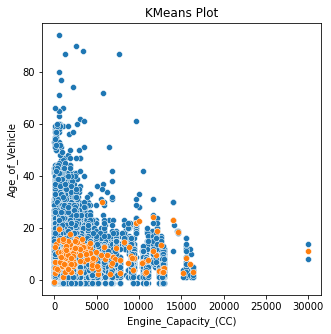

KMeans inertia for  150  :  5314690.576015422


In [ ]:
kmeans_cluster(df_veh_feature, feature, 150)

In [ ]:
inertia = []
range = [25, 50, 75, 150, 200]
for i in range:
  kmeans_range = KMeans(n_clusters=i)
  kmeans_range.fit(df_veh_feature)
  inertia.append(kmeans_range.inertia_)

inertia : [521243509.83667713, 86205983.5178526, 27237072.179856822, 5276111.102344872, 3142071.539033961]


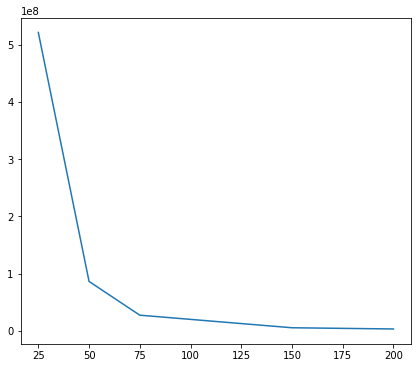

In [ ]:
print('inertia :', inertia)
plt.figure(figsize=(7, 6))
sns.lineplot(x=range, y=inertia)
plt.show()

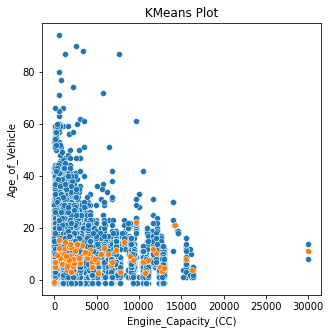

KMeans inertia for  75  :  26349876.21366576


In [ ]:
kmeans_cluster(df_veh_feature, feature, 75)

In [ ]:
# other features that could have impact

feature = ['Vehicle_Type', 'Age_of_Vehicle']
df_veh_feature = df_acc_veh_merge[feature].copy()

In [ ]:
inertia = []
range = [25, 50, 75, 150, 200]
for i in range:
  kmeans_range = KMeans(n_clusters=i)
  kmeans_range.fit(df_veh_feature)
  inertia.append(kmeans_range.inertia_)

inertia : [168878.0339812315, 62014.606400940844, 29379.825588064665, 7022.838067667692, 2973.987817875615]


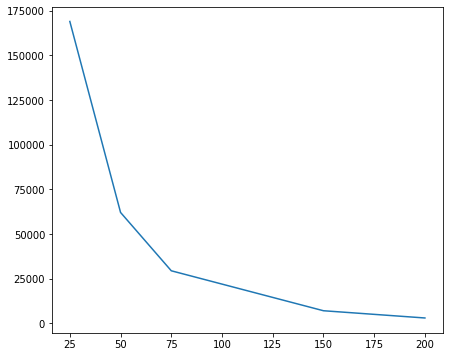

In [ ]:
print('inertia :', inertia)
plt.figure(figsize=(7, 6))
sns.lineplot(x=range, y=inertia)
plt.show()

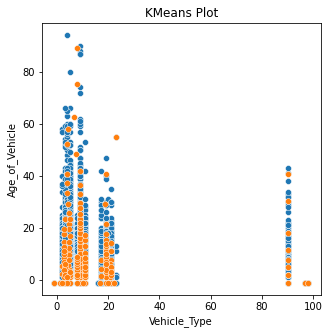

KMeans inertia for  150  :  6963.988361062799


In [ ]:
kmeans_cluster(df_veh_feature, feature, 150)

**Are there particular conditions (weather, geographic location, situations) that generate more road traffic accidents?**

In [ ]:
# features to consider

#features = ['Weather_Conditions', 'Speed_limit', 'Road_Surface_Conditions', 'Special_Conditions_at_Site']
#features = ['Speed_limit', 'Special_Conditions_at_Site', 'Junction_Detail', 'Road_Type']
#features = ['Light_Conditions', 'Weather_Conditions', 'Speed_limit', 'Junction_Detail']
features = ['Latitude', 'Longitude', 'Weather_Conditions', 'Speed_limit']
target = ['Accident_Severity']

In [ ]:
# split the features and target 
x = df_acc_cpy.loc[:, features].values
y = df_acc_cpy.loc[:, target].values
x = StandardScaler().fit_transform(x)   #standardize the features

In [ ]:
# Apply PCA

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

In [ ]:
# concat the results

finalDf = pd.concat([principalDf, df_acc_cpy[target]], axis = 1)
finalDf.dropna(inplace=True)
finalDf

,principal component 1,principal component 2,Accident_Severity
0,-1.097120,-0.291297,3.0
1,-1.145457,-0.299461,3.0
2,-1.102333,-0.291687,3.0
3,-1.258872,-0.004660,2.0
4,-1.058082,-0.285165,3.0
...,...,...,...
117440,2.830365,-0.596864,3.0
117441,2.725136,-0.608638,2.0
117442,2.756611,-0.608322,3.0
117443,2.101709,0.228365,3.0


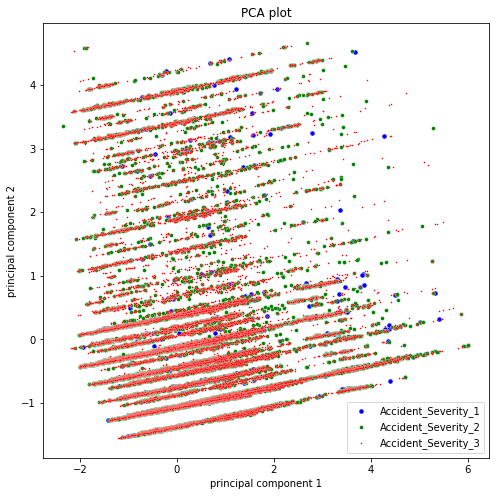

In [ ]:
# generate the PCA plot

one = finalDf[finalDf['Accident_Severity'] == 1]
two = finalDf[finalDf['Accident_Severity'] == 2]
three = finalDf[finalDf['Accident_Severity'] == 3]

plt.figure(figsize=(8, 8))

sns.scatterplot(data=one, x=one['principal component 1'], y=one['principal component 2'], color='blue', s=25)
sns.scatterplot(data=two, x=two['principal component 1'], y=two['principal component 2'], color='green', s=15)
sns.scatterplot(data=three, x=three['principal component 1'], y=three['principal component 2'], color='red', s=2.5)
plt.legend(labels=['Accident_Severity_1','Accident_Severity_2', 'Accident_Severity_3'])
plt.title('PCA plot')
plt.show()

In [ ]:
print('Variance of each component:', pca.explained_variance_ratio_)
print('Total Variance Explained:', round(sum(list(pca.explained_variance_ratio_))*100, 2))

Variance of each component: [0.36555157 0.25240513]
Total Variance Explained: 61.8


In [ ]:
inertia = []
range = [25, 50, 75, 150, 200]
for i in range:
  kmeans_range = KMeans(n_clusters=i)
  kmeans_range.fit(finalDf)
  inertia.append(kmeans_range.inertia_)

inertia : [17476.15077869514, 9139.13980078923, 6166.18818529871, 2917.306241747061, 2055.331184319526]


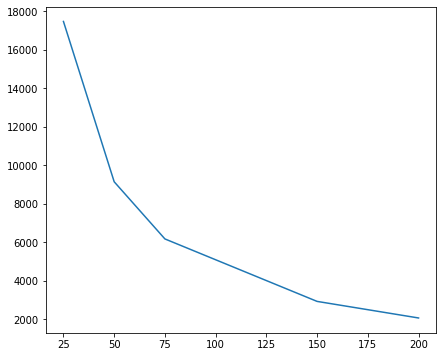

In [ ]:
print('inertia :', inertia)
plt.figure(figsize=(7, 6))
sns.lineplot(x=range, y=inertia)
plt.show()

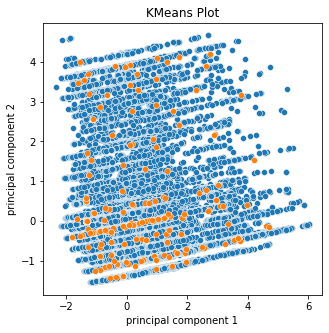

KMeans inertia for  150  :  2915.6555140910814


In [ ]:
kmeans_cluster(finalDf, ['principal component 1', 'principal component 2'], 150)

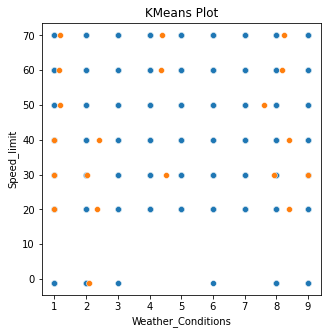

KMeans inertia for  20  :  13733.412570991557


In [ ]:
feature = ['Weather_Conditions', 'Speed_limit']
df_acc_feature = df_acc_veh_merge[feature].copy()

kmeans_cluster(df_acc_feature, feature, 20)

In [ ]:
# get the top features in correlation with accident severity
target = df_acc_cpy['Accident_Severity']
df_acc_feature = df_acc_cpy.drop('Accident_Severity', axis=1)
top_5 = list(df_acc_feature.corrwith(target).sort_values(ascending=False).iloc[:6].index)
top_5

['Did_Police_Officer_Attend_Scene_of_Accident',
 'Number_of_Vehicles',
 '2nd_Road_Class',
 'Longitude',
 'Location_Easting_OSGR',
 'Junction_Control']

Association Pattern Mining

In [ ]:
# function to calculate the support
def calc_support(df, col1, value1, col2, value2):
  try:
    freq = len(df[(df[col1] == value1) & (df[col2] == value2)])
    support = freq / len(df)
    return support
  except Exception as err:
    print('Something went wrong...', err)

In [ ]:
def calc_confidence(df, col1, value1, col2, value2):
  try:
    freq_col1_col2 = len(df[(df[col1] == value1) & (df[col2] == value2)])
    freq_col1 = len(df[df[col1] == value1])
    confidence = freq_col1_col2 / freq_col1
    return confidence
  except Exception as err:
    print('Something went wrong...', err)

In [ ]:
# rule 1 : speed limit = 30mph -> accident severity = slight

support_speed20_severity_slight = calc_support(df_acc_cpy, 'Speed_limit', 30, 'Accident_Severity', 3)
confidence_speed20_severity_slight = calc_confidence(df_acc_cpy, 'Speed_limit', 30, 'Accident_Severity', 3)
print('Support :', support_speed20_severity_slight)
print('Confidence :', confidence_speed20_severity_slight)

Support : 0.4745114734556601
Confidence : 0.8046463275530978


In [ ]:
# get dummy values for apriori

df_acc_dummy = df_acc_cpy[['Accident_Severity', 'Speed_limit', 'Weather_Conditions', 'Road_Type', 'Road_Surface_Conditions']].copy()
df_severity_dummy = pd.get_dummies(df_acc_dummy.Accident_Severity, prefix='Severity')
df_speed_dummy = pd.get_dummies(df_acc_dummy.Speed_limit, prefix='Speed_limit')
df_weather_dummy = pd.get_dummies(df_acc_dummy.Weather_Conditions, prefix='Weather_Conditions')
df_road_type_dummy = pd.get_dummies(df_acc_dummy.Road_Type, prefix='Road_Type')
df_road_surface_dummy = pd.get_dummies(df_acc_dummy.Road_Surface_Conditions, prefix='Road_Surface_Conditions')
df_apriori = pd.concat([df_severity_dummy, df_speed_dummy, df_weather_dummy, df_road_type_dummy, df_road_surface_dummy], axis=1)

In [ ]:
df_apriori

,Severity_1,Severity_2,Severity_3,Speed_limit_-1,Speed_limit_20,Speed_limit_30,Speed_limit_40,Speed_limit_50,Speed_limit_60,Speed_limit_70,...,Road_Type_3,Road_Type_6,Road_Type_7,Road_Type_9,Road_Surface_Conditions_-1,Road_Surface_Conditions_1,Road_Surface_Conditions_2,Road_Surface_Conditions_3,Road_Surface_Conditions_4,Road_Surface_Conditions_5
0,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,1,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
3,0,1,0,0,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
4,0,0,1,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117531,0,0,1,0,0,0,0,0,1,0,...,0,1,0,0,0,0,1,0,0,0
117532,0,0,1,0,0,0,0,0,1,0,...,0,1,0,0,0,0,1,0,0,0
117533,0,0,1,0,0,0,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
117534,0,0,1,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0


In [ ]:
# Apply Apriori

apriori(df_apriori, min_support=0.5, use_colnames=True)

,support,itemsets
0,0.786572,(Severity_3)
1,0.589714,(Speed_limit_30)
2,0.785483,(Weather_Conditions_1)
3,0.725957,(Road_Type_6)
4,0.700439,(Road_Surface_Conditions_1)
5,0.614194,"(Weather_Conditions_1, Severity_3)"
6,0.560467,"(Road_Type_6, Severity_3)"
7,0.552105,"(Road_Surface_Conditions_1, Severity_3)"
8,0.574950,"(Weather_Conditions_1, Road_Type_6)"
9,0.661901,"(Weather_Conditions_1, Road_Surface_Conditions_1)"


In [ ]:
# Association Pattern Mining

frequent_itemsets = apriori(df_apriori, min_support=0.5, use_colnames=True)
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=0.5)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Weather_Conditions_1),(Severity_3),0.785483,0.786572,0.614194,0.781932,0.994100,-0.003645,0.978720
1,(Severity_3),(Weather_Conditions_1),0.786572,0.785483,0.614194,0.780848,0.994100,-0.003645,0.978854
2,(Road_Type_6),(Severity_3),0.725957,0.786572,0.560467,0.772038,0.981522,-0.010551,0.936244
3,(Severity_3),(Road_Type_6),0.786572,0.725957,0.560467,0.712543,0.981522,-0.010551,0.953336
4,(Road_Surface_Conditions_1),(Severity_3),0.700439,0.786572,0.552105,0.788228,1.002105,0.001160,1.007818
5,(Severity_3),(Road_Surface_Conditions_1),0.786572,0.700439,0.552105,0.701913,1.002105,0.001160,1.004946
6,(Weather_Conditions_1),(Road_Type_6),0.785483,0.725957,0.574950,0.731970,1.008284,0.004724,1.022436
7,(Road_Type_6),(Weather_Conditions_1),0.725957,0.785483,0.574950,0.791989,1.008284,0.004724,1.031280
8,(Weather_Conditions_1),(Road_Surface_Conditions_1),0.785483,0.700439,0.661901,0.842668,1.203058,0.111719,1.904013
9,(Road_Surface_Conditions_1),(Weather_Conditions_1),0.700439,0.785483,0.661901,0.944981,1.203058,0.111719,3.898994


In [ ]:
df_acc_dummy = df_acc_cpy[['Accident_Severity', 'Speed_limit', 'Weather_Conditions', 'Did_Police_Officer_Attend_Scene_of_Accident', 'Number_of_Vehicles']].copy()
df_severity_dummy = pd.get_dummies(df_acc_dummy.Accident_Severity, prefix='Severity')
df_speed_dummy = pd.get_dummies(df_acc_dummy.Speed_limit, prefix='Speed_limit')
df_weather_dummy = pd.get_dummies(df_acc_dummy.Weather_Conditions, prefix='Weather_Conditions')
df_police_attend_dummy = pd.get_dummies(df_acc_dummy.Did_Police_Officer_Attend_Scene_of_Accident, prefix='Did_Police_Officer_Attend_Scene_of_Accident')
df_n_vehicles_dummy = pd.get_dummies(df_acc_dummy.Number_of_Vehicles, prefix='Number_of_Vehicles')
df_apriori = pd.concat([df_severity_dummy, df_speed_dummy, df_weather_dummy, df_police_attend_dummy, df_n_vehicles_dummy], axis=1)

In [ ]:
apriori(df_apriori, min_support=0.3, use_colnames=True)

,support,itemsets
0,0.786572,(Severity_3)
1,0.589714,(Speed_limit_30)
2,0.785483,(Weather_Conditions_1)
3,0.691864,(Did_Police_Officer_Attend_Scene_of_Accident_1)
4,0.611691,(Number_of_Vehicles_2)
5,0.474511,"(Severity_3, Speed_limit_30)"
6,0.614194,"(Weather_Conditions_1, Severity_3)"
7,0.515927,"(Severity_3, Did_Police_Officer_Attend_Scene_o..."
8,0.503759,"(Number_of_Vehicles_2, Severity_3)"
9,0.465307,"(Weather_Conditions_1, Speed_limit_30)"


In [ ]:
df_acc_cpy.Number_of_Vehicles

0         2
1         2
2         2
3         1
4         2
         ..
117531    1
117532    4
117533    2
117534    1
117535    1
Name: Number_of_Vehicles, Length: 117445, dtype: int64

In [ ]:
# association pattern rules

frequent_itemsets = apriori(df_apriori, min_support=0.3, use_colnames=True)
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=0.5)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Severity_3),(Speed_limit_30),0.786572,0.589714,0.474511,0.603265,1.022978,0.010658,1.034155
1,(Speed_limit_30),(Severity_3),0.589714,0.786572,0.474511,0.804646,1.022978,0.010658,1.092519
2,(Weather_Conditions_1),(Severity_3),0.785483,0.786572,0.614194,0.781932,0.994100,-0.003645,0.978720
3,(Severity_3),(Weather_Conditions_1),0.786572,0.785483,0.614194,0.780848,0.994100,-0.003645,0.978854
4,(Severity_3),(Did_Police_Officer_Attend_Scene_of_Accident_1),0.786572,0.691864,0.515927,0.655917,0.948044,-0.028275,0.895529
...,...,...,...,...,...,...,...,...,...
57,"(Weather_Conditions_1, Did_Police_Officer_Atte...",(Number_of_Vehicles_2),0.550913,0.611691,0.323675,0.587524,0.960493,-0.013313,0.941412
58,"(Number_of_Vehicles_2, Did_Police_Officer_Atte...",(Weather_Conditions_1),0.399515,0.785483,0.323675,0.810170,1.031430,0.009863,1.130052
59,(Weather_Conditions_1),"(Number_of_Vehicles_2, Did_Police_Officer_Atte...",0.785483,0.399515,0.323675,0.412071,1.031430,0.009863,1.021358
60,(Number_of_Vehicles_2),"(Weather_Conditions_1, Did_Police_Officer_Atte...",0.611691,0.550913,0.323675,0.529148,0.960493,-0.013313,0.953775


In [ ]:
df_acc_dummy = df_acc_cpy[['Accident_Severity', 'Speed_limit', 'Weather_Conditions', 'Did_Police_Officer_Attend_Scene_of_Accident', 'Pedestrian_Crossing-Physical_Facilities']].copy()
df_severity_dummy = pd.get_dummies(df_acc_dummy.Accident_Severity, prefix='Severity')
df_speed_dummy = pd.get_dummies(df_acc_dummy.Speed_limit, prefix='Speed_limit')
df_weather_dummy = pd.get_dummies(df_acc_dummy.Weather_Conditions, prefix='Weather_Conditions')
df_police_attend_dummy = pd.get_dummies(df_acc_dummy.Did_Police_Officer_Attend_Scene_of_Accident, prefix='Did_Police_Officer_Attend_Scene_of_Accident')
df_ped_dummy = pd.get_dummies(df_acc_dummy['Pedestrian_Crossing-Physical_Facilities'], prefix='Pedestrian_Crossing-Physical_Facilities')
df_apriori = pd.concat([df_severity_dummy, df_speed_dummy, df_weather_dummy, df_police_attend_dummy, df_ped_dummy], axis=1)

In [ ]:
apriori(df_apriori, min_support=0.3, use_colnames=True)

,support,itemsets
0,0.786572,(Severity_3)
1,0.589714,(Speed_limit_30)
2,0.785483,(Weather_Conditions_1)
3,0.691864,(Did_Police_Officer_Attend_Scene_of_Accident_1)
4,0.766870,(Pedestrian_Crossing-Physical_Facilities_0)
5,0.474511,"(Severity_3, Speed_limit_30)"
6,0.614194,"(Weather_Conditions_1, Severity_3)"
7,0.515927,"(Severity_3, Did_Police_Officer_Attend_Scene_o..."
8,0.595147,"(Pedestrian_Crossing-Physical_Facilities_0, Se..."
9,0.465307,"(Weather_Conditions_1, Speed_limit_30)"


In [ ]:
# association pattern rules

frequent_itemsets = apriori(df_apriori, min_support=0.2, use_colnames=True)
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=0.5)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Severity_3),(Speed_limit_30),0.786572,0.589714,0.474511,0.603265,1.022978,0.010658,1.034155
1,(Speed_limit_30),(Severity_3),0.589714,0.786572,0.474511,0.804646,1.022978,0.010658,1.092519
2,(Weather_Conditions_1),(Severity_3),0.785483,0.786572,0.614194,0.781932,0.994100,-0.003645,0.978720
3,(Severity_3),(Weather_Conditions_1),0.786572,0.785483,0.614194,0.780848,0.994100,-0.003645,0.978854
4,(Severity_3),(Did_Police_Officer_Attend_Scene_of_Accident_1),0.786572,0.691864,0.515927,0.655917,0.948044,-0.028275,0.895529
...,...,...,...,...,...,...,...,...,...
145,(Did_Police_Officer_Attend_Scene_of_Accident_1...,"(Weather_Conditions_1, Pedestrian_Crossing-Phy...",0.382460,0.608523,0.227025,0.593593,0.975465,-0.005710,0.963263
146,(Weather_Conditions_1),"(Pedestrian_Crossing-Physical_Facilities_0, Di...",0.785483,0.281570,0.227025,0.289027,1.026482,0.005857,1.010488
147,(Pedestrian_Crossing-Physical_Facilities_0),"(Weather_Conditions_1, Did_Police_Officer_Atte...",0.766870,0.306893,0.227025,0.296042,0.964643,-0.008321,0.984586
148,(Did_Police_Officer_Attend_Scene_of_Accident_1),"(Weather_Conditions_1, Pedestrian_Crossing-Phy...",0.691864,0.336753,0.227025,0.328136,0.974410,-0.005962,0.987174


In [ ]:
df_acc_dummy = df_acc_cpy[['Accident_Severity', 'Speed_limit', 'Road_Type']].copy()
df_severity_dummy = pd.get_dummies(df_acc_dummy.Accident_Severity, prefix='Severity')
df_speed_dummy = pd.get_dummies(df_acc_dummy.Speed_limit, prefix='Speed_limit')
df_road_type_dummy = pd.get_dummies(df_acc_dummy.Road_Type, prefix='Road_Type')
df_apriori = pd.concat([df_severity_dummy, df_speed_dummy, df_road_type_dummy], axis=1)

In [ ]:
apriori(df_apriori, min_support=0.25, use_colnames=True)

,support,itemsets
0,0.786572,(Severity_3)
1,0.589714,(Speed_limit_30)
2,0.725957,(Road_Type_6)
3,0.474511,"(Severity_3, Speed_limit_30)"
4,0.560467,"(Road_Type_6, Severity_3)"
5,0.472792,"(Road_Type_6, Speed_limit_30)"
6,0.375929,"(Road_Type_6, Severity_3, Speed_limit_30)"


In [ ]:
# association pattern rules

frequent_itemsets = apriori(df_apriori, min_support=0.35, use_colnames=True)
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=0.5)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Severity_3),(Speed_limit_30),0.786572,0.589714,0.474511,0.603265,1.022978,0.010658,1.034155
1,(Speed_limit_30),(Severity_3),0.589714,0.786572,0.474511,0.804646,1.022978,0.010658,1.092519
2,(Road_Type_6),(Severity_3),0.725957,0.786572,0.560467,0.772038,0.981522,-0.010551,0.936244
3,(Severity_3),(Road_Type_6),0.786572,0.725957,0.560467,0.712543,0.981522,-0.010551,0.953336
4,(Road_Type_6),(Speed_limit_30),0.725957,0.589714,0.472792,0.651267,1.104377,0.044684,1.176503
5,(Speed_limit_30),(Road_Type_6),0.589714,0.725957,0.472792,0.801730,1.104377,0.044684,1.382170
6,"(Road_Type_6, Severity_3)",(Speed_limit_30),0.560467,0.589714,0.375929,0.670743,1.137404,0.045414,1.246096
7,"(Road_Type_6, Speed_limit_30)",(Severity_3),0.472792,0.786572,0.375929,0.795127,1.010875,0.004044,1.041754
8,"(Severity_3, Speed_limit_30)",(Road_Type_6),0.474511,0.725957,0.375929,0.792245,1.091311,0.031454,1.319066
9,(Road_Type_6),"(Severity_3, Speed_limit_30)",0.725957,0.474511,0.375929,0.517840,1.091311,0.031454,1.089862


In [ ]:
support = calc_support(df_acc_cpy, 'Accident_Severity', 3, 'Road_Type', 6)
support

0.5604666013878837

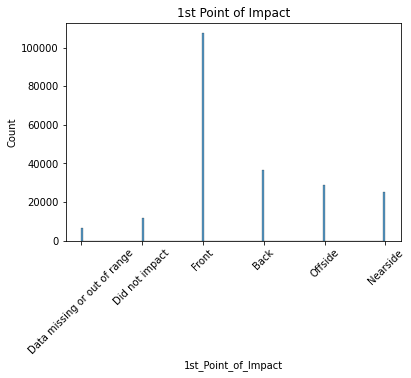

In [ ]:
# visiualise the plot for 1st point of impact

impact_point_plot = sns.histplot(data=df_veh_cpy, x='1st_Point_of_Impact')
plt.title('1st Point of Impact')
plt.xticks(ticks=[-1, 0, 1, 2, 3, 4], labels=['Data missing or out of range', 'Did not impact', 'Front', 'Back', 'Offside', 'Nearside'], rotation='45')
plt.show()

**How does driver related variables affect the outcome (e.g., age of the driver, and the purpose of the journey)?**

In [ ]:
# features to look for 

features = ['Vehicle_Type', 'Sex_of_Driver', 'Age_of_Driver', 'Age_of_Vehicle', 'Journey_Purpose_of_Driver']

df_features = df_acc_veh_merge[(df_acc_veh_merge['Vehicle_Type'] > -1) & (df_acc_veh_merge['Sex_of_Driver'] > -1) & (df_acc_veh_merge['Age_of_Driver'] > -1) & (df_acc_veh_merge['Age_of_Vehicle'] > -1) & (df_acc_veh_merge['Journey_Purpose_of_Driver'] > -1)]
df_features

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type,Vehicle_IMD_Decile
15,2019010155206,548535.0,188113.0,0.141957,51.572326,1,3,2,1,2019-01-01,...,6,2,81,11,1242,1,4,-1,-1,-1
21,2019010155210,537356.0,183448.0,-0.021065,51.533238,1,1,1,1,2019-01-01,...,1,1,33,6,2198,2,4,-1,-1,-1
24,2019010155217,543616.0,186274.0,0.070277,51.557075,1,2,2,1,2019-01-01,...,1,1,30,6,1499,1,1,-1,-1,-1
105,2019010155425,533271.0,186512.0,-0.078765,51.561751,1,3,1,1,2019-02-01,...,6,1,23,5,2996,1,1,2,1,2
181,2019010155627,520571.0,179155.0,-0.264403,51.498486,1,2,2,1,2019-03-01,...,1,1,25,5,125,1,1,-1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175502,2019984107019,337522.0,591682.0,-2.983499,55.215407,98,3,4,1,2019-05-30,...,1,1,20,4,2198,2,4,5,3,5
175503,2019984107219,318544.0,567087.0,-3.274645,54.991685,98,3,2,1,2019-06-21,...,6,1,33,6,1997,2,12,3,2,3
175504,2019984107219,318544.0,567087.0,-3.274645,54.991685,98,3,2,1,2019-06-21,...,6,1,61,9,2967,2,5,7,3,7
175505,2019984107419,336525.0,584226.0,-2.997491,55.148292,98,3,1,1,2019-06-29,...,5,1,78,11,1597,2,6,8,3,8


Feature Engineering

In [ ]:
# feature selection
selector = SelectKBest(f_classif, k='all')
selector.fit(df_features[features], df_features['Accident_Severity'])

# get scores from p values
scores = -np.log10(selector.pvalues_)

In [ ]:
scores

array([ 22.31528437, 127.88151352,  54.03965181,  25.62710813,
         4.44459414])

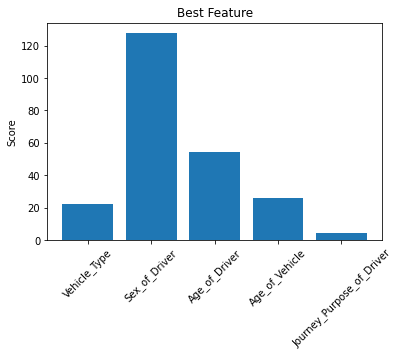

In [ ]:
# plot showing the feature with best scores

plt.bar(features, scores)
plt.xticks(rotation=45)
plt.ylabel('Score')
plt.title('Best Feature')
plt.show()

---
Predictions
---

**Can we make predictions about when and where accidents will occur, and the severity of the injuries sustained from the data supplied to improve road safety? How well do our models compare to government models?**

In [ ]:
# function to hold the set of models we are going to use to predict
def get_models():
  models = dict()
  models['dtree'] = DecisionTreeClassifier(criterion='gini')
  models['knn'] = KNeighborsClassifier()
  models['lr'] = LogisticRegression()
  models['bayes'] = GaussianNB()
  return models

In [ ]:
# function to get train and test data
def get_dataset(df_features, df_target, test_size=0.25, random_state=1):
  
  x_train, x_test, y_train, y_test = train_test_split(df_features, df_target, test_size=test_size, random_state=random_state)
  
  # standarize the training data
  scaler = StandardScaler()
  x_train = scaler.fit_transform(x_train)
  x_test = scaler.fit_transform(x_test)

  return x_train, x_test, y_train, y_test

In [ ]:
# function to run cross validation on the set of models and return their corresponding scores
def evaluate_model(model, X, y):
  cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
  scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1,error_score='raise')
  return scores

In [ ]:
# function to get the scores of all the models for the given features

def get_scores(x_features, y_target):
  x_train, x_test, y_train, y_test = get_dataset(x_features, y_target)
  models = get_models()
  for name, model in models.items():
    scores = evaluate_model(model, x_train, y_train)
    print('>%s %.3f' % (name, mean(scores)))

In [ ]:
# function to return the time window based on the time passed

def time_range(time):
    if time>=0 and time<4:
      return '00:00-04:00'
    elif time>=4 and time<8:
      return '04:00-08:00'
    elif time>=8 and time<12:
      return '08:00-12:00'
    elif time>=12 and time<16:
      return '12:00-16:00'
    elif time>=16 and time<20:
      return '16:00-20:00'
    else:
      return '20:00-24:00'

In [ ]:
# function to compare the predictions with the test data
def compare_prediction(y_pred, y_test):
  correct_predictions = np.nonzero(y_pred == y_test)[0]
  incorrect_predictions = np.nonzero(y_pred != y_test)[0]
  print(len(correct_predictions)," classified correctly")
  print(len(incorrect_predictions)," classified incorrectly")

Predicitng when the accidents happen

In [ ]:
# generate the time range column
df_x = df_acc_veh_merge.copy()
df_x['Time range'] = df_x['Decimal Time'].apply(lambda x:time_range(x))

In [ ]:
# predicting when the accidents could happen based on Time range
features = ['Time range', 'Accident_Severity', 'Weather_Conditions', 'Light_Conditions', 'Speed_limit', 'Journey_Purpose_of_Driver', 'Road_Surface_Conditions', 'Urban_or_Rural_Area', 'Road_Type']

df_features = df_x[features]
df_features = df_features[(df_features['Weather_Conditions'] > -1) & (df_features['Light_Conditions'] > -1) & (df_features['Speed_limit'] > -1) & (df_features['Journey_Purpose_of_Driver'] > -1) & (df_features['Road_Surface_Conditions'] > -1) & (df_features['Road_Type'] > -1)]

y_target = df_features['Time range'].values
x_features = df_features.drop('Time range', axis=1)

In [ ]:
# get the accuracy scores for different models predicting when the accidents could happen
get_scores(x_features, y_target)

>dtree 0.396
>knn 0.337
>lr 0.373
>bayes 0.353


In [ ]:
# predicting when the accidents could happen based on Time range
features = ['Latitude', 'Longitude', 'Accident_Severity', 'Weather_Conditions', 'Light_Conditions', 'Speed_limit', 'Journey_Purpose_of_Driver', 'Road_Surface_Conditions', 'Urban_or_Rural_Area', 'Road_Type']

df_features = df_x[features]
df_features = df_features[(df_features['Weather_Conditions'] > -1) & (df_features['Light_Conditions'] > -1) & (df_features['Speed_limit'] > -1) & (df_features['Journey_Purpose_of_Driver'] > -1) & (df_features['Road_Surface_Conditions'] > -1) & (df_features['Road_Type'] > -1)]

y_target = df_features['Weather_Conditions'].values
x_features = df_features.drop('Weather_Conditions', axis=1)

In [ ]:
# get the accuracy scores for different models predicting when the accidents could happen based on weather conditions
get_scores(x_features, y_target)

>dtree 0.876
>knn 0.819
>lr 0.795
>bayes 0.796


In [ ]:
# Decisison Tree Model on test data

x_train, x_test, y_train, y_test= get_dataset(x_features, y_target)

model_when = DecisionTreeClassifier(criterion='gini')
model_when.fit(x_train, y_train)

y_pred = model_when.predict(x_test)

In [ ]:
# get the accuracy score 
print('Accuracy Score : ', round(accuracy_score(y_test, y_pred), 2))

Accuracy Score :  0.81


In [ ]:
# compare the prediction with test data
compare_prediction(y_pred, y_test)

In [ ]:
# predicting when the accidents could happen based on speed limit

y_target = df_features['Speed_limit'].values
x_features = df_features.drop('Speed_limit', axis=1)

get_scores(x_features, y_target)

>dtree 0.845
>knn 0.705
>lr 0.669
>bayes 0.642


In [ ]:
# Decision Tree Model on test data

x_train, x_test, y_train, y_test= get_dataset(x_features, y_target)

model_when = DecisionTreeClassifier(criterion='gini')
model_when.fit(x_train, y_train)

y_pred = model_when.predict(x_test)

In [ ]:
# get the accuracy score 
print('Accuracy Score : ', round(accuracy_score(y_test, y_pred), 2))

Accuracy Score :  0.72


In [ ]:
# compare the prediction with test data
compare_prediction(y_pred, y_test)

Predicting where the accidents happen

In [ ]:
# predicting where the accidents could happen based on road type

y_target = df_features['Road_Type'].values
x_features = df_features.drop('Road_Type', axis=1)

get_scores(x_features, y_target)

>dtree 0.871
>knn 0.763
>lr 0.775
>bayes 0.667


In [ ]:
# Decision Tree Model on test data

x_train, x_test, y_train, y_test= get_dataset(x_features, y_target)

model_where = DecisionTreeClassifier(criterion='gini')
model_where.fit(x_train, y_train)

y_pred = model_where.predict(x_test)

In [ ]:
# get the accuracy score 
print('Accuracy Score : ', round(accuracy_score(y_test, y_pred), 2))

Accuracy Score :  0.74


In [ ]:
# compare the prediction with test data
compare_prediction(y_pred, y_test)

31927  classified correctly
11391  classified incorrectly


Predicting the severity of the accidents

In [ ]:
# predicting where the accidents could happen based on road type

y_target = df_features['Accident_Severity'].values
x_features = df_features.drop('Accident_Severity', axis=1)

get_scores(x_features, y_target)

>dtree 0.819
>knn 0.773
>lr 0.798
>bayes 0.782


In [ ]:
# Decision Tree Model on test data

x_train, x_test, y_train, y_test= get_dataset(x_features, y_target)

model_where = DecisionTreeClassifier(criterion='gini')
model_where.fit(x_train, y_train)

y_pred = model_where.predict(x_test)

In [ ]:
# get the accuracy score 
print('Accuracy Score : ', round(accuracy_score(y_test, y_pred), 2))

Accuracy Score :  0.75


In [ ]:
# compare the prediction with test data
compare_prediction(y_pred, y_test)

32381  classified correctly
10937  classified incorrectly


In [ ]:
# ensemble
# function to stack the models

def get_stacking():
  level0 = list()
  level0.append(('dtree', DecisionTreeClassifier()))
  level0.append(('knn', KNeighborsClassifier()))
  level0.append(('lr', LogisticRegression()))
  level0.append(('bayes', GaussianNB()))

  level1 = LogisticRegression()

  model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)

  return model

In [ ]:
# function to hold the set of models we are going to use to predict with the get_stacking function
def get_models():
  models = dict()
  models['dtree'] = DecisionTreeClassifier(criterion='gini')
  models['knn'] = KNeighborsClassifier()
  models['lr'] = LogisticRegression()
  models['bayes'] = GaussianNB()
  models['stacked'] = get_stacking()
  return models

In [ ]:
# predicting where the accidents could happen based on road type (stacked)

y_target = df_features['Accident_Severity'].values
x_features = df_features.drop('Accident_Severity', axis=1)

get_scores(x_features, y_target)

>dtree 0.819
>knn 0.773
>lr 0.798
>bayes 0.782
>stacked 0.824


In [ ]:
model = get_stacking()
model

StackingClassifier(cv=5,
                   estimators=[('dtree', DecisionTreeClassifier()),
                               ('knn', KNeighborsClassifier()),
                               ('lr', LogisticRegression()),
                               ('bayes', GaussianNB())],
                   final_estimator=LogisticRegression())